# Task 5: Personal Loan Acceptance Prediction using Simulated Dataset
### Problem Statement
Predict which customers are likely to accept a personal loan offer using demographic and marketing data.


# Import libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the simulated dataset

In [25]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('bank_marketing_simulated_large.csv')
df.columns = df.columns.str.strip()
df.head()

Saving bank_marketing_simulated_large.csv to bank_marketing_simulated_large (3).csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,single,professional.course,no,9894,yes,yes,cellular,4,nov,209,5,999,0,nonexistent,no
1,25,blue-collar,divorced,university.degree,no,5211,yes,no,telephone,25,aug,110,6,999,3,success,yes
2,19,entrepreneur,divorced,high.school,yes,1851,yes,no,telephone,13,mar,654,2,999,5,nonexistent,yes
3,65,services,single,professional.course,yes,9084,yes,yes,cellular,28,aug,421,8,999,0,nonexistent,yes
4,35,student,married,university.degree,no,8324,no,no,cellular,17,sep,664,2,19,3,nonexistent,yes


# Check structure

In [26]:
print("Shape: ", df.shape)
print("Columns: ", df.columns.tolist())

Shape:  (100, 17)
Columns:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


# Handle missing values (if any)

In [27]:
df.ffill(inplace=True)
df.dropna(inplace=True)

# Encode categorical features

In [28]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target

In [29]:
X = df.drop(columns='y')  # 'y' is the target: 1 = Subscribed, 0 = Not Subscribed
y = df['y']

# Split data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier

In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Predict and evaluate

In [33]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.55
Confusion Matrix:
 [[5 7]
 [2 6]]


# Plot target distribution

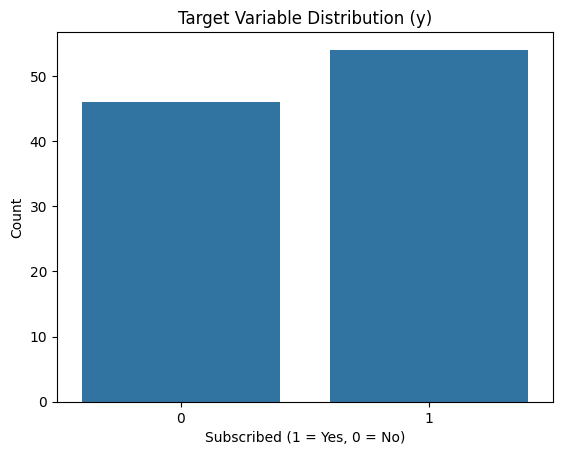

In [34]:
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution (y)")
plt.xlabel("Subscribed (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()